### Import library and data

In [47]:
import pandas as pd

In [48]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/glass.data.txt", header=None)
df.head() # Dataset has no column name

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [49]:
# get data descriptive statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [50]:
# Drop the first column as it looks like a row index

df=df.drop([0], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Standardize the dataset (feature)

In [51]:
X=df.iloc[:, 0:len(df)]
y=df[10]

In [52]:
# Standardize X features
from sklearn.preprocessing import StandardScaler

feat=StandardScaler()

X=feat.fit_transform(X)

### Split dataset for training and testing

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

### KNN model building

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Loop and find a good k
listK=[]
testAccuracy=[]
trainAccuracy=[]
Variation=[]

for k in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    testAcc=accuracy_score(y_test, y_pred)
    print("Test Accuracy is {}".format(testAcc))
    trainAcc=accuracy_score(y_train, y_pred_train)
    print("Train Accuracy is {}".format(trainAcc))
    diff=trainAcc-testAcc
    print("-----Accuracy Difference is {}".format(diff))
    listK.append(k)
    testAccuracy.append(testAcc)
    trainAccuracy.append(trainAcc)
    Variation.append(diff)

Test Accuracy is 0.813953488372093
Train Accuracy is 0.9005847953216374
-----Accuracy Difference is 0.08663130694954435
Test Accuracy is 0.7441860465116279
Train Accuracy is 0.9064327485380117
-----Accuracy Difference is 0.1622467020263838
Test Accuracy is 0.7674418604651163
Train Accuracy is 0.8771929824561403
-----Accuracy Difference is 0.10975112199102399
Test Accuracy is 0.813953488372093
Train Accuracy is 0.8830409356725146
-----Accuracy Difference is 0.0690874473004216
Test Accuracy is 0.813953488372093
Train Accuracy is 0.8713450292397661
-----Accuracy Difference is 0.05739154086767306
Test Accuracy is 0.7906976744186046
Train Accuracy is 0.8654970760233918
-----Accuracy Difference is 0.07479940160478715
Test Accuracy is 0.7674418604651163
Train Accuracy is 0.8070175438596491
-----Accuracy Difference is 0.03957568339453277
Test Accuracy is 0.7674418604651163
Train Accuracy is 0.8128654970760234
-----Accuracy Difference is 0.04542363661090709


In [62]:
# Training Accuracy
print(trainAccuracy)

[0.9005847953216374, 0.9064327485380117, 0.8771929824561403, 0.8830409356725146, 0.8713450292397661, 0.8654970760233918, 0.8070175438596491, 0.8128654970760234]


In [63]:
# Test Accuracy
print([round(x, 3) for x in testAccuracy])

[0.814, 0.744, 0.767, 0.814, 0.814, 0.791, 0.767, 0.767]


In [64]:
# Difference in training and testing accuracy
print([round(x,3) for x in Variation])

[0.087, 0.162, 0.11, 0.069, 0.057, 0.075, 0.04, 0.045]


In [65]:
# Find the optimal test accuracy
print("Index: {} ---Optimal Accuracy {}".format(testAccuracy.index(max(testAccuracy)) +1, max(testAccuracy)))

Index: 1 ---Optimal Accuracy 0.813953488372093


### Visualize the result

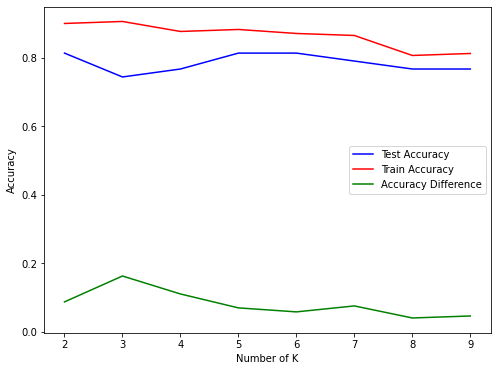

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.plot(listK, testAccuracy, color="b", label="Test Accuracy")
plt.plot(listK, trainAccuracy, color="r", label="Train Accuracy")
plt.plot(listK, Variation, color="g", label="Accuracy Difference")
plt.legend()
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.show()

### Feature Selection

In [13]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
# Feature and target 
X=df.iloc[:, 0:len(df)]
y=df[10]

In [15]:
featSelect=SelectKBest(score_func=chi2, k="all")
featSelect.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x00000214A3BAE940>)

In [19]:
# Print ketqua
featImportance=pd.DataFrame({"Feature": X.columns, "Score": featSelect.scores_})
featImportance

,Feature,Score
0,1,0.000048
1,2,4.311253
2,3,100.984212
3,4,16.977488
4,5,0.110449
5,6,31.670632
6,7,3.210929
7,8,145.514077
8,9,2.170185
9,10,339.047059


# Exercise 3 NBA Players

In [90]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/nba_2013.csv")
# Drop some columns that are not used to predict points
df=df.drop(["player","bref_team_id","season","season_end"], axis=1)
# Remove "." in column names
#df.columns=[x.strip(".") for x in df.columns]
df.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [98]:
# Check mising values if available
df.isnull().sum()[df.isnull().sum()>0]

x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

In [101]:
# Filling missing data using median 
# fg. variable
df["fg."].fillna(df["fg."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
# x2p. variable
df["x2p."].fillna(df["x2p."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
#x3p. variable
df["x3p."].fillna(df["x3p."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
#efg. variable
df["efg."].fillna(df["efg."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)
# ft. variable
df["ft."].fillna(df["ft."].sum(axis=0, skipna=True)/len(df.fg), inplace=True)

In [105]:
# Check mising values if available
df.isnull().any().values.sum()

0

#### Feature and Target

In [110]:
X=df.iloc[:, 0:len(df)]
y=df["pts"]
# Get dummies 

X=pd.get_dummies(X)

#### Split data for training and testing

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Building KNN model

In [130]:
from sklearn.neighbors import KNeighborsRegressor 
listK=[]
testAccuracy=[]

for k in range(2, 20):
    listK.append(int(k))
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    #y_pred=knn.predict(X_test)
    testAcc=knn.score(X_test, y_test)
    testAccuracy.append(testAcc)

### Visualizing the result 

In [136]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

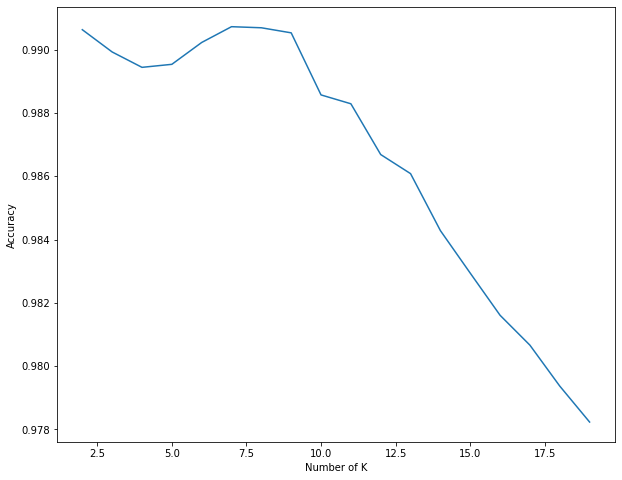

In [137]:
plt.figure(figsize=(10,8))
plt.plot(listK, testAccuracy)
plt.xlabel("Number of K")
plt.ylabel("Accuracy") 

### Report "best" K 

In [140]:
print("K={} is Optimal Accuracy {}".format(testAccuracy.index(max(testAccuracy)) +1, max(testAccuracy)))

K=6 is Optimal Accuracy 0.9907213951204517


- Rerun the model with K=6 and test if train accuracy and test accuracy are not significantly different. Conclude that K=6 is best

## Select Best Features

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [142]:
bestFeat=SelectKBest(score_func=f_regression, k="all")
bestFeat.fit(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: divide by zero encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


SelectKBest(k='all', score_func=<function f_regression at 0x00000214A3BAEA60>)

<BarContainer object of 33 artists>

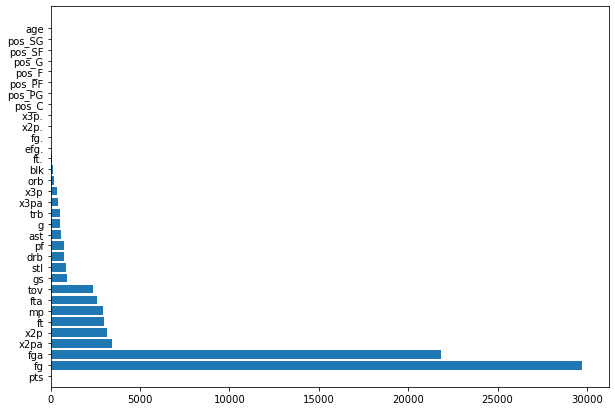

In [154]:
featImpo=pd.DataFrame({"Feature":X.columns,"Score": bestFeat.scores_})
featImpo=featImpo.nlargest(33,"Score")
plt.figure(figsize=(10,7))
plt.barh(featImpo.Feature, featImpo.Score)